In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [45]:
df = pd.read_csv(r"C:\Users\sunny\Desktop\DS Material\Data Set\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
 df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

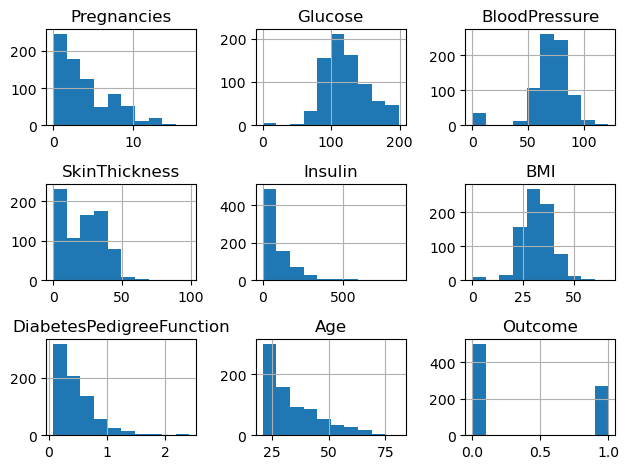

In [49]:
df.hist()
plt.tight_layout()

In [50]:
df.loc[:,'Glucose':'BMI'] = df.loc[:,'Glucose':'BMI'].replace(0,np.nan)

In [51]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
# We feel null values with median bcz there is skewness in columns

si = SimpleImputer(strategy='median')

In [54]:
df.loc[:,'Glucose':'BMI'] = si.fit_transform(df.loc[:,'Glucose':'BMI'])

In [55]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()

In [58]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [59]:
# We can not do feature scaling on target column

x = sc.fit_transform(x)

x

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state= 0)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier()

knn.fit(xtrain,ytrain)

ypred = knn.predict(xtest)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [65]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       107
           1       0.62      0.64      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154



In [66]:
confusion_matrix(ytest,ypred)

array([[89, 18],
       [17, 30]], dtype=int64)

- 89 and 30 are TN and TP

In [67]:
print(knn.score(xtrain,ytrain))
print(knn.score(xtest,ytest))

0.8029315960912052
0.7727272727272727


- Training accuracy is greater than testing accuracy, so we need to select Optimal k value

#  Selecting best K value

In [68]:
trainacc = []
testacc= []

for i in range (1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    trainacc.append(knn.score(xtrain,ytrain))
    testacc.append(knn.score(xtest,ytest))
    

Text(0, 0.5, 'Accuracy')

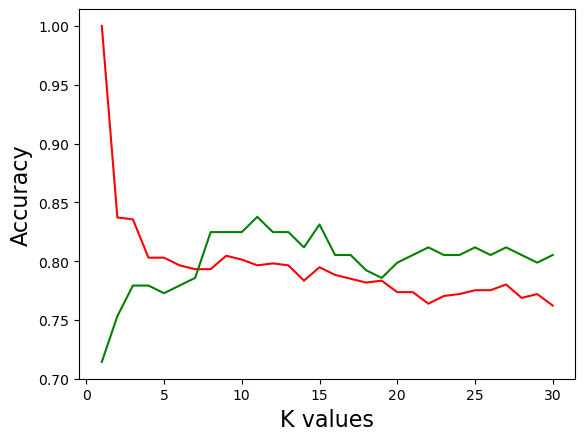

In [74]:
plt.plot(range(1,31), trainacc, color = 'r')
plt.plot(range(1,31), testacc, color = 'g')
plt.xlabel('K values', size = 16)
plt.ylabel('Accuracy', size = 16)

- We need to check that value where training value and testing value is equal(where two lines are joined)

In [72]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(xtrain,ytrain)

ypred = knn.predict(xtest)

In [73]:
print(knn.score(xtrain,ytrain))
print(knn.score(xtest,ytest))

0.7931596091205212
0.7857142857142857


-  The model is generalized